In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import seaborn as sns
sns.set_theme()

In [4]:
plt.rcParams["figure.figsize"] = (15,9)

In [5]:
CALENDAR_PATH = os.path.abspath('../input/m5-forecasting-accuracy/calendar.csv')
SELL_PRICE_PATH = os.path.abspath('../input/m5-forecasting-accuracy/sell_prices.csv')
SALES_TV_PATH = os.path.abspath('../input/m5-forecasting-accuracy/sales_train_validation.csv')

In [6]:
df_calendar = pd.read_csv(CALENDAR_PATH)
df_calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [7]:
df_sell_price = pd.read_csv(SELL_PRICE_PATH)
df_sell_price.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [8]:
df_sales_tv = pd.read_csv(SALES_TV_PATH)
df_sales_tv.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [9]:
df_calendar.shape

(1969, 14)

In [10]:
df_sell_price.shape

(6841121, 4)

In [11]:
df_sales_tv.shape

(30490, 1919)

In [12]:
df_sell_price['state'] = df_sell_price['store_id'].apply(lambda x: x.split('_')[0])
df_sell_price.head()

,store_id,item_id,wm_yr_wk,sell_price,state
0,CA_1,HOBBIES_1_001,11325,9.58,CA
1,CA_1,HOBBIES_1_001,11326,9.58,CA
2,CA_1,HOBBIES_1_001,11327,8.26,CA
3,CA_1,HOBBIES_1_001,11328,8.26,CA
4,CA_1,HOBBIES_1_001,11329,8.26,CA


In [13]:
# drop store_id and item_id

In [14]:
df_sell_price.drop(['store_id', 'item_id'], axis = 1, inplace = True)

In [15]:
df_sell_price = df_sell_price.groupby(['state', 'wm_yr_wk']).agg( sales_price_min = ('sell_price', min),
        sales_price_max = ('sell_price', max),
        sales_price_mean = ('sell_price', np.mean)).reset_index()

In [16]:
df_sell_price.head()

,state,wm_yr_wk,sales_price_min,sales_price_max,sales_price_mean
0,CA,11101,0.2,22.0,4.108908
1,CA,11102,0.2,22.0,4.177565
2,CA,11103,0.2,22.0,4.196517
3,CA,11104,0.2,22.0,4.204878
4,CA,11105,0.2,22.0,4.205234


In [17]:
df_sell_price.shape

(846, 5)

### Drop `event_name_2`, `event_type_2` and `wday` from `df_calendar`

In [18]:
df_calendar.drop(['event_name_1', 'event_name_2', 'event_type_2', 'wday', 'month', 'year'], axis=1, inplace=True)

In [19]:
df_calendar.head()

,date,wm_yr_wk,weekday,d,event_type_1,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,d_1,NaN,0,0,0
1,2011-01-30,11101,Sunday,d_2,NaN,0,0,0
2,2011-01-31,11101,Monday,d_3,NaN,0,0,0
3,2011-02-01,11101,Tuesday,d_4,NaN,1,1,0
4,2011-02-02,11101,Wednesday,d_5,NaN,1,0,1


In [20]:
df_calendar.isna().sum()

date               0
wm_yr_wk           0
weekday            0
d                  0
event_type_1    1807
snap_CA            0
snap_TX            0
snap_WI            0
dtype: int64

In [21]:
df_calendar.event_type_1.fillna('Daily', inplace=True)

# Downcast to save memory.

https://www.kaggle.com/code/anshuls235/time-series-forecasting-eda-fe-modelling

In [22]:
def downcast(df):
    cols = df.dtypes.index.tolist()
    types = df.dtypes.values.tolist()
    for i,t in enumerate(types):
        if 'int' in str(t):
            if df[cols[i]].min() > np.iinfo(np.int8).min and df[cols[i]].max() < np.iinfo(np.int8).max:
                df[cols[i]] = df[cols[i]].astype(np.int8)
            elif df[cols[i]].min() > np.iinfo(np.int16).min and df[cols[i]].max() < np.iinfo(np.int16).max:
                df[cols[i]] = df[cols[i]].astype(np.int16)
            elif df[cols[i]].min() > np.iinfo(np.int32).min and df[cols[i]].max() < np.iinfo(np.int32).max:
                df[cols[i]] = df[cols[i]].astype(np.int32)
            else:
                df[cols[i]] = df[cols[i]].astype(np.int64)
        elif 'float' in str(t):
            if df[cols[i]].min() > np.finfo(np.float16).min and df[cols[i]].max() < np.finfo(np.float16).max:
                df[cols[i]] = df[cols[i]].astype(np.float16)
            elif df[cols[i]].min() > np.finfo(np.float32).min and df[cols[i]].max() < np.finfo(np.float32).max:
                df[cols[i]] = df[cols[i]].astype(np.float32)
            else:
                df[cols[i]] = df[cols[i]].astype(np.float64)
        elif t == object:
            if cols[i] == 'date':
                df[cols[i]] = pd.to_datetime(df[cols[i]], format='%Y-%m-%d')
            else:
                df[cols[i]] = df[cols[i]].astype('category')
    return df 

In [23]:
df_calendar = downcast(df_calendar)
df_sell_price = downcast(df_sell_price)
df_sales_tv = downcast(df_sales_tv)

In [24]:
df_calendar.head()

,date,wm_yr_wk,weekday,d,event_type_1,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,d_1,Daily,0,0,0
1,2011-01-30,11101,Sunday,d_2,Daily,0,0,0
2,2011-01-31,11101,Monday,d_3,Daily,0,0,0
3,2011-02-01,11101,Tuesday,d_4,Daily,1,1,0
4,2011-02-02,11101,Wednesday,d_5,Daily,1,0,1


In [25]:
df_calendar.shape

(1969, 8)

## Merge `df_calendar` with `df_sell_price` on `wm_yr_wk`

In [26]:
df_calendar = df_calendar.merge(df_sell_price, how='left', on=['wm_yr_wk'])
df_calendar.head()

,date,wm_yr_wk,weekday,d,event_type_1,snap_CA,snap_TX,snap_WI,state,sales_price_min,sales_price_max,sales_price_mean
0,2011-01-29,11101,Saturday,d_1,Daily,0,0,0,CA,0.199951,22.0,4.109375
1,2011-01-29,11101,Saturday,d_1,Daily,0,0,0,TX,0.199951,22.0,3.990234
2,2011-01-29,11101,Saturday,d_1,Daily,0,0,0,WI,0.199951,22.0,4.109375
3,2011-01-30,11101,Sunday,d_2,Daily,0,0,0,CA,0.199951,22.0,4.109375
4,2011-01-30,11101,Sunday,d_2,Daily,0,0,0,TX,0.199951,22.0,3.990234


In [27]:
df_calendar.duplicated().sum()

0

In [28]:
df_calendar.drop(['wm_yr_wk'], axis = 1, inplace = True)

In [29]:
df_calendar.set_index('d', inplace=True)
df_calendar.head()

,date,weekday,event_type_1,snap_CA,snap_TX,snap_WI,state,sales_price_min,sales_price_max,sales_price_mean
d,,,,,,,,,,
d_1,2011-01-29,Saturday,Daily,0,0,0,CA,0.199951,22.0,4.109375
d_1,2011-01-29,Saturday,Daily,0,0,0,TX,0.199951,22.0,3.990234
d_1,2011-01-29,Saturday,Daily,0,0,0,WI,0.199951,22.0,4.109375
d_2,2011-01-30,Sunday,Daily,0,0,0,CA,0.199951,22.0,4.109375
d_2,2011-01-30,Sunday,Daily,0,0,0,TX,0.199951,22.0,3.990234


In [30]:
df_calendar.shape

(5907, 10)

In [31]:
# Drop `id, item_id, dept_id, cat_id, store_id` from `df_sales_tv`
df_states = df_sales_tv.drop(['id', 'item_id', 'dept_id', 'cat_id', 'store_id'], axis = 1)
df_states.head()

,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,CA,0,0,0,0,0,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,CA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,CA,0,0,0,0,0,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,CA,0,0,0,0,0,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,CA,0,0,0,0,0,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [32]:
df_states = df_states.groupby('state_id').sum()
df_states.head()

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
state_id,,,,,,,,,,,,,,,,,,,,,
CA,14195,13805,10108,11047,9925,11322,12251,16610,14696,11822,...,16255,20564,23032,17052.0,15784.0,15148.0,14488.0,17095,21834,23187
TX,9438,9630,6778,7381,5912,9006,6226,9440,9376,7319,...,10800,12460,13709,9868.0,10922.0,9600.0,9602.0,10615,12266,12282
WI,8998,8314,6897,6984,3309,8883,9533,11882,8664,6431,...,14734,15338,14899,11139.0,10864.0,10595.0,10943.0,12807,14862,14326


In [33]:
df_states.T

state_id,CA,TX,WI
d_1,14195.0,9438.0,8998.0
d_2,13805.0,9630.0,8314.0
d_3,10108.0,6778.0,6897.0
d_4,11047.0,7381.0,6984.0
d_5,9925.0,5912.0,3309.0
...,...,...,...
d_1909,15148.0,9600.0,10595.0
d_1910,14488.0,9602.0,10943.0
d_1911,17095.0,10615.0,12807.0
d_1912,21834.0,12266.0,14862.0


## Merge DF states with Calendar

In [34]:
def merge_df():
    states = df_states.T
    sales_df = pd.merge(states, df_calendar, left_index = True, right_index = True)
    sales_df = sales_df.reset_index()
    sales_df['date'] = pd.to_datetime(sales_df['date'])
    sales_df.set_index('date', inplace = True)
    sales_df.drop(['index'], axis=1, inplace=True)
    return sales_df

In [35]:
sales_df = merge_df()
sales_df.head()

,CA,TX,WI,weekday,event_type_1,snap_CA,snap_TX,snap_WI,state,sales_price_min,sales_price_max,sales_price_mean
date,,,,,,,,,,,,
2011-01-29,14195.0,9438.0,8998.0,Saturday,Daily,0,0,0,CA,0.199951,22.0,4.109375
2011-01-29,14195.0,9438.0,8998.0,Saturday,Daily,0,0,0,TX,0.199951,22.0,3.990234
2011-01-29,14195.0,9438.0,8998.0,Saturday,Daily,0,0,0,WI,0.199951,22.0,4.109375
2011-02-07,11822.0,7319.0,6431.0,Monday,Daily,1,1,0,CA,0.199951,22.0,4.175781
2011-02-07,11822.0,7319.0,6431.0,Monday,Daily,1,1,0,TX,0.199951,28.0,4.074219


In [36]:
sales_df.shape

(5739, 12)

## Feature Engineering

In [37]:
sales_df = pd.get_dummies(sales_df, columns=['weekday', 'event_type_1', 'state'])
sales_df.head()

,CA,TX,WI,snap_CA,snap_TX,snap_WI,sales_price_min,sales_price_max,sales_price_mean,weekday_Friday,...,weekday_Tuesday,weekday_Wednesday,event_type_1_Cultural,event_type_1_Daily,event_type_1_National,event_type_1_Religious,event_type_1_Sporting,state_CA,state_TX,state_WI
date,,,,,,,,,,,,,,,,,,,,,
2011-01-29,14195.0,9438.0,8998.0,0,0,0,0.199951,22.0,4.109375,0,...,0,0,0,1,0,0,0,1,0,0
2011-01-29,14195.0,9438.0,8998.0,0,0,0,0.199951,22.0,3.990234,0,...,0,0,0,1,0,0,0,0,1,0
2011-01-29,14195.0,9438.0,8998.0,0,0,0,0.199951,22.0,4.109375,0,...,0,0,0,1,0,0,0,0,0,1
2011-02-07,11822.0,7319.0,6431.0,1,1,0,0.199951,22.0,4.175781,0,...,0,0,0,1,0,0,0,1,0,0
2011-02-07,11822.0,7319.0,6431.0,1,1,0,0.199951,28.0,4.074219,0,...,0,0,0,1,0,0,0,0,1,0


In [38]:
sales_df = downcast(sales_df)

In [39]:
sales_df.shape

(5739, 24)

In [40]:
sales_df.index.min()

Timestamp('2011-01-29 00:00:00')

In [41]:
sales_df.index.max()

Timestamp('2016-04-24 00:00:00')

In [42]:
sales_df.duplicated().sum()

0

In [43]:
sales_df.sort_index(inplace = True)

### Keep 2016 onwards for test set.

In [44]:
sales_df_test = sales_df[pd.to_datetime('2016-01-01'):]

In [45]:
sales_df_test.head()

,CA,TX,WI,snap_CA,snap_TX,snap_WI,sales_price_min,sales_price_max,sales_price_mean,weekday_Friday,...,weekday_Tuesday,weekday_Wednesday,event_type_1_Cultural,event_type_1_Daily,event_type_1_National,event_type_1_Religious,event_type_1_Sporting,state_CA,state_TX,state_WI
date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,13360.0,8848.0,10440.0,1,1,0,0.199951,29.96875,4.503906,1,...,0,0,0,0,1,0,0,0,0,1
2016-01-01,13360.0,8848.0,10440.0,1,1,0,0.199951,29.96875,4.488281,1,...,0,0,0,0,1,0,0,1,0,0
2016-01-01,13360.0,8848.0,10440.0,1,1,0,0.199951,29.96875,4.460938,1,...,0,0,0,0,1,0,0,0,1,0
2016-01-02,19056.0,10408.0,15272.0,1,0,1,0.199951,29.96875,4.460938,0,...,0,0,0,1,0,0,0,0,1,0
2016-01-02,19056.0,10408.0,15272.0,1,0,1,0.199951,29.96875,4.503906,0,...,0,0,0,1,0,0,0,0,0,1


In [46]:
sales_df_train = sales_df[:pd.to_datetime('2015-12-31')]
sales_df_train.tail()

,CA,TX,WI,snap_CA,snap_TX,snap_WI,sales_price_min,sales_price_max,sales_price_mean,weekday_Friday,...,weekday_Tuesday,weekday_Wednesday,event_type_1_Cultural,event_type_1_Daily,event_type_1_National,event_type_1_Religious,event_type_1_Sporting,state_CA,state_TX,state_WI
date,,,,,,,,,,,,,,,,,,,,,
2015-12-30,14776.0,8736.0,10608.0,0,0,0,0.199951,29.96875,4.460938,0,...,0,1,0,1,0,0,0,0,1,0
2015-12-30,14776.0,8736.0,10608.0,0,0,0,0.199951,29.96875,4.503906,0,...,0,1,0,1,0,0,0,0,0,1
2015-12-31,16248.0,11160.0,15648.0,0,0,0,0.199951,29.96875,4.488281,0,...,0,0,0,1,0,0,0,1,0,0
2015-12-31,16248.0,11160.0,15648.0,0,0,0,0.199951,29.96875,4.460938,0,...,0,0,0,1,0,0,0,0,1,0
2015-12-31,16248.0,11160.0,15648.0,0,0,0,0.199951,29.96875,4.503906,0,...,0,0,0,1,0,0,0,0,0,1


In [47]:
sales_df_train.shape

(5394, 24)

In [48]:
sales_df_test.shape

(345, 24)

## Create Lagged Feature

In [ ]:
for i in range(1, 29):
    sales_df_train[f'CA_lagged_{i}'] = sales_df_train['CA'].shift(-1*i)
    sales_df_train[f'TX_lagged_{i}'] = sales_df_train['TX'].shift(-1*i)
    sales_df_train[f'WI_lagged_{i}'] = sales_df_train['WI'].shift(-1*i)

### 

In [ ]:
for i in range(1, 29):
    sales_df_test[f'CA_lagged_{i}'] = sales_df_test['CA'].shift(-1*i)
    sales_df_test[f'TX_lagged_{i}'] = sales_df_test['TX'].shift(-1*i)
    sales_df_test[f'WI_lagged_{i}'] = sales_df_test['WI'].shift(-1*i)

In [51]:
sales_df_train.shape

(5394, 108)

In [52]:
sales_df_test.shape

(345, 108)

In [53]:
sales_df_train.isna().sum()

CA               0
TX               0
WI               0
snap_CA          0
snap_TX          0
                ..
TX_lagged_27    27
WI_lagged_27    27
CA_lagged_28    28
TX_lagged_28    28
WI_lagged_28    28
Length: 108, dtype: int64

## Drop NaN because of Lagging

In [ ]:
sales_df_train.dropna(inplace = True)

In [55]:
sales_df_test.dropna(inplace = True)

In [56]:
sales_df_train.shape

(5366, 108)

In [57]:
sales_df_test.shape

(317, 108)

## Scale Numerical Columns

In [58]:
cols_to_scale = ['sales_price_min', 'sales_price_max', 'sales_price_mean']

# Add lagged columns except for 28

lagged_columns = []
lagged_columns.append('CA')
lagged_columns.append('TX')
lagged_columns.append('WI')
for i in range(1, 28):
    lagged_columns.append(f'CA_lagged_{i}')
    lagged_columns.append(f'TX_lagged_{i}')
    lagged_columns.append(f'WI_lagged_{i}')
    
cols_to_scale = cols_to_scale + lagged_columns
cols_to_scale

['sales_price_min',
 'sales_price_max',
 'sales_price_mean',
 'CA',
 'TX',
 'WI',
 'CA_lagged_1',
 'TX_lagged_1',
 'WI_lagged_1',
 'CA_lagged_2',
 'TX_lagged_2',
 'WI_lagged_2',
 'CA_lagged_3',
 'TX_lagged_3',
 'WI_lagged_3',
 'CA_lagged_4',
 'TX_lagged_4',
 'WI_lagged_4',
 'CA_lagged_5',
 'TX_lagged_5',
 'WI_lagged_5',
 'CA_lagged_6',
 'TX_lagged_6',
 'WI_lagged_6',
 'CA_lagged_7',
 'TX_lagged_7',
 'WI_lagged_7',
 'CA_lagged_8',
 'TX_lagged_8',
 'WI_lagged_8',
 'CA_lagged_9',
 'TX_lagged_9',
 'WI_lagged_9',
 'CA_lagged_10',
 'TX_lagged_10',
 'WI_lagged_10',
 'CA_lagged_11',
 'TX_lagged_11',
 'WI_lagged_11',
 'CA_lagged_12',
 'TX_lagged_12',
 'WI_lagged_12',
 'CA_lagged_13',
 'TX_lagged_13',
 'WI_lagged_13',
 'CA_lagged_14',
 'TX_lagged_14',
 'WI_lagged_14',
 'CA_lagged_15',
 'TX_lagged_15',
 'WI_lagged_15',
 'CA_lagged_16',
 'TX_lagged_16',
 'WI_lagged_16',
 'CA_lagged_17',
 'TX_lagged_17',
 'WI_lagged_17',
 'CA_lagged_18',
 'TX_lagged_18',
 'WI_lagged_18',
 'CA_lagged_19',
 'TX_lagge

In [59]:
from sklearn.preprocessing import MinMaxScaler

In [60]:
scaler_instance = MinMaxScaler()

In [ ]:
sales_df_train[cols_to_scale] = scaler_instance.fit_transform(sales_df_train[cols_to_scale])
sales_df_train.head()

In [62]:
sales_df_test[cols_to_scale] = scaler_instance.fit_transform(sales_df_test[cols_to_scale])
sales_df_test.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,CA,TX,WI,snap_CA,snap_TX,snap_WI,sales_price_min,sales_price_max,sales_price_mean,weekday_Friday,...,WI_lagged_25,CA_lagged_26,TX_lagged_26,WI_lagged_26,CA_lagged_27,TX_lagged_27,WI_lagged_27,CA_lagged_28,TX_lagged_28,WI_lagged_28
date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,0.030273,0.136719,0.179688,1,1,0,0.833496,0.0,1.000,1,...,0.745605,0.812500,0.768555,0.745605,0.753906,0.687500,0.364746,22208.0,12632.0,12520.0
2016-01-01,0.030273,0.136719,0.179688,1,1,0,0.833496,0.0,0.625,1,...,0.745605,0.753906,0.687500,0.364746,0.753906,0.687500,0.364746,22208.0,12632.0,12520.0
2016-01-01,0.030273,0.136719,0.179688,1,1,0,0.833496,0.0,0.000,1,...,0.364746,0.753906,0.687500,0.364746,0.753906,0.687500,0.364746,16208.0,10528.0,11256.0
2016-01-02,0.496094,0.368164,0.609863,1,0,1,0.833496,0.0,0.000,0,...,0.364746,0.753906,0.687500,0.364746,0.262695,0.364258,0.252441,16208.0,10528.0,11256.0
2016-01-02,0.496094,0.368164,0.609863,1,0,1,0.833496,0.0,1.000,0,...,0.364746,0.262695,0.364258,0.252441,0.262695,0.364258,0.252441,16208.0,10528.0,11256.0


In [63]:
sales_df_train_dates = sales_df_train.index.values
sales_df_train_dates

array(['2011-01-29T00:00:00.000000000', '2011-01-29T00:00:00.000000000',
       '2011-01-29T00:00:00.000000000', ...,
       '2015-12-21T00:00:00.000000000', '2015-12-22T00:00:00.000000000',
       '2015-12-22T00:00:00.000000000'], dtype='datetime64[ns]')

In [64]:
sales_df_test_dates = sales_df_test.index.values
sales_df_test_dates

array(['2016-01-01T00:00:00.000000000', '2016-01-01T00:00:00.000000000',
       '2016-01-01T00:00:00.000000000', '2016-01-02T00:00:00.000000000',
       '2016-01-02T00:00:00.000000000', '2016-01-02T00:00:00.000000000',
       '2016-01-03T00:00:00.000000000', '2016-01-03T00:00:00.000000000',
       '2016-01-03T00:00:00.000000000', '2016-01-04T00:00:00.000000000',
       '2016-01-04T00:00:00.000000000', '2016-01-04T00:00:00.000000000',
       '2016-01-05T00:00:00.000000000', '2016-01-05T00:00:00.000000000',
       '2016-01-05T00:00:00.000000000', '2016-01-06T00:00:00.000000000',
       '2016-01-06T00:00:00.000000000', '2016-01-06T00:00:00.000000000',
       '2016-01-07T00:00:00.000000000', '2016-01-07T00:00:00.000000000',
       '2016-01-07T00:00:00.000000000', '2016-01-08T00:00:00.000000000',
       '2016-01-08T00:00:00.000000000', '2016-01-08T00:00:00.000000000',
       '2016-01-09T00:00:00.000000000', '2016-01-09T00:00:00.000000000',
       '2016-01-09T00:00:00.000000000', '2016-01-10

## Drop Date Index

In [65]:
sales_df_train.reset_index(inplace = True)
sales_df_train.head()

,date,CA,TX,WI,snap_CA,snap_TX,snap_WI,sales_price_min,sales_price_max,sales_price_mean,...,WI_lagged_25,CA_lagged_26,TX_lagged_26,WI_lagged_26,CA_lagged_27,TX_lagged_27,WI_lagged_27,CA_lagged_28,TX_lagged_28,WI_lagged_28
0,2011-01-29,0.573730,0.503418,0.50000,0,0,0,1.0,0.0,0.230469,...,0.481201,0.593750,0.500000,0.481201,0.477539,0.390381,0.357422,11824.0,7320.0,6432.0
1,2011-01-29,0.573730,0.503418,0.50000,0,0,0,1.0,0.0,0.000000,...,0.481201,0.477539,0.390381,0.357422,0.477539,0.390381,0.357422,11824.0,7320.0,6432.0
2,2011-01-29,0.573730,0.503418,0.50000,0,0,0,1.0,0.0,0.230469,...,0.357422,0.477539,0.390381,0.357422,0.477539,0.390381,0.357422,10936.0,6224.0,5912.0
3,2011-01-30,0.558105,0.513672,0.46167,0,0,0,1.0,0.0,0.230469,...,0.357422,0.477539,0.390381,0.357422,0.441650,0.332031,0.328369,10936.0,6224.0,5912.0
4,2011-01-30,0.558105,0.513672,0.46167,0,0,0,1.0,0.0,0.000000,...,0.357422,0.441650,0.332031,0.328369,0.441650,0.332031,0.328369,10936.0,6224.0,5912.0


In [66]:
sales_df_train.drop(['date'], axis = 1, inplace = True)
sales_df_train.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,CA,TX,WI,snap_CA,snap_TX,snap_WI,sales_price_min,sales_price_max,sales_price_mean,weekday_Friday,...,WI_lagged_25,CA_lagged_26,TX_lagged_26,WI_lagged_26,CA_lagged_27,TX_lagged_27,WI_lagged_27,CA_lagged_28,TX_lagged_28,WI_lagged_28
0,0.573730,0.503418,0.50000,0,0,0,1.0,0.0,0.230469,0,...,0.481201,0.593750,0.500000,0.481201,0.477539,0.390381,0.357422,11824.0,7320.0,6432.0
1,0.573730,0.503418,0.50000,0,0,0,1.0,0.0,0.000000,0,...,0.481201,0.477539,0.390381,0.357422,0.477539,0.390381,0.357422,11824.0,7320.0,6432.0
2,0.573730,0.503418,0.50000,0,0,0,1.0,0.0,0.230469,0,...,0.357422,0.477539,0.390381,0.357422,0.477539,0.390381,0.357422,10936.0,6224.0,5912.0
3,0.558105,0.513672,0.46167,0,0,0,1.0,0.0,0.230469,0,...,0.357422,0.477539,0.390381,0.357422,0.441650,0.332031,0.328369,10936.0,6224.0,5912.0
4,0.558105,0.513672,0.46167,0,0,0,1.0,0.0,0.000000,0,...,0.357422,0.441650,0.332031,0.328369,0.441650,0.332031,0.328369,10936.0,6224.0,5912.0


In [67]:
sales_df_test.reset_index(inplace = True, drop = True)
sales_df_test.head()

,CA,TX,WI,snap_CA,snap_TX,snap_WI,sales_price_min,sales_price_max,sales_price_mean,weekday_Friday,...,WI_lagged_25,CA_lagged_26,TX_lagged_26,WI_lagged_26,CA_lagged_27,TX_lagged_27,WI_lagged_27,CA_lagged_28,TX_lagged_28,WI_lagged_28
0,0.030273,0.136719,0.179688,1,1,0,0.833496,0.0,1.000,1,...,0.745605,0.812500,0.768555,0.745605,0.753906,0.687500,0.364746,22208.0,12632.0,12520.0
1,0.030273,0.136719,0.179688,1,1,0,0.833496,0.0,0.625,1,...,0.745605,0.753906,0.687500,0.364746,0.753906,0.687500,0.364746,22208.0,12632.0,12520.0
2,0.030273,0.136719,0.179688,1,1,0,0.833496,0.0,0.000,1,...,0.364746,0.753906,0.687500,0.364746,0.753906,0.687500,0.364746,16208.0,10528.0,11256.0
3,0.496094,0.368164,0.609863,1,0,1,0.833496,0.0,0.000,0,...,0.364746,0.753906,0.687500,0.364746,0.262695,0.364258,0.252441,16208.0,10528.0,11256.0
4,0.496094,0.368164,0.609863,1,0,1,0.833496,0.0,1.000,0,...,0.364746,0.262695,0.364258,0.252441,0.262695,0.364258,0.252441,16208.0,10528.0,11256.0


In [68]:
train_y = sales_df_train[['CA_lagged_28', 'TX_lagged_28', 'WI_lagged_28']].values
test_y = sales_df_test[['CA_lagged_28', 'TX_lagged_28', 'WI_lagged_28']].values

In [69]:
train_y

array([[11824.,  7320.,  6432.],
       [11824.,  7320.,  6432.],
       [10936.,  6224.,  5912.],
       ...,
       [16248., 11160., 15648.],
       [16248., 11160., 15648.],
       [16248., 11160., 15648.]], dtype=float16)

In [70]:
train_y.shape

(5366, 3)

In [71]:
test_y

array([[22208., 12632., 12520.],
       [22208., 12632., 12520.],
       [16208., 10528., 11256.],
       [16208., 10528., 11256.],
       [16208., 10528., 11256.],
       [14056., 10192., 10872.],
       [14056., 10192., 10872.],
       [14056., 10192., 10872.],
       [13000.,  9536.,  9688.],
       [13000.,  9536.,  9688.],
       [13000.,  9536.,  9688.],
       [13368.,  9312., 13176.],
       [13368.,  9312., 13176.],
       [13368.,  9312., 13176.],
       [15800., 10856., 15136.],
       [15800., 10856., 15136.],
       [15800., 10856., 15136.],
       [21376., 12768., 17008.],
       [21376., 12768., 17008.],
       [21376., 12768., 17008.],
       [20848., 13104., 11576.],
       [20848., 13104., 11576.],
       [20848., 13104., 11576.],
       [18000., 10688.,  9648.],
       [18000., 10688.,  9648.],
       [18000., 10688.,  9648.],
       [13384.,  9008.,  9592.],
       [13384.,  9008.,  9592.],
       [13384.,  9008.,  9592.],
       [14240.,  8768.,  9672.],
       [14

In [72]:
test_y.shape

(317, 3)

In [73]:
train_x = sales_df_train.drop(['CA_lagged_28', 'TX_lagged_28', 'WI_lagged_28'], axis = 1)
test_x = sales_df_test.drop(['CA_lagged_28', 'TX_lagged_28', 'WI_lagged_28'], axis = 1)

In [74]:
train_x.shape

(5366, 105)

In [75]:
test_x.shape

(317, 105)

# LSTM Modelling

## Make Data for LSTM Model

In [76]:
train_X = []
train_Y = []
test_X = []
test_Y = []

We are modifying problem here. Given the past 28 days, predict the next 1 day.

In [77]:
n_future = 28
n_past = 28

In [78]:
train_x.shape

(5366, 105)

In [79]:
train_y.shape

(5366, 3)

In [80]:
train_x_processed = train_x.values
test_x_processed = test_x.values

In [81]:
train_x_processed.shape

(5366, 105)

In [82]:
test_x_processed.shape

(317, 105)

In [83]:
for i in range(n_past, len(train_x_processed) - n_future + 1):
    train_X.append(train_x_processed[i - n_past:i, 0:train_x_processed.shape[1]])
    train_Y.append(train_y[i + n_future - 1:i+n_future, ])

In [84]:
for i in range(n_past, len(test_x_processed) - n_future + 1):
    test_X.append(test_x_processed[i - n_past:i, 0:test_x_processed.shape[1]])
    test_Y.append(test_y[i + n_future - 1:i+n_future, ])

In [85]:
#train_Y

In [86]:
train_X, train_Y = np.array(train_X), np.array(train_Y)
test_X, test_Y = np.array(test_X), np.array(test_Y)

In [87]:
train_X.shape

(5311, 28, 105)

In [88]:
train_Y.shape

(5311, 1, 3)

In [89]:
test_X.shape

(262, 28, 105)

In [90]:
test_Y.shape

(262, 1, 3)

# LSTM Modelling

In [91]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM, RepeatVector, TimeDistributed , Dropout

In [92]:
from tensorflow.keras.models import Sequential

In [93]:
tf.keras.backend.clear_session()

In [94]:
model = Sequential()
model.add(LSTM(256, activation='relu', input_shape = (train_X.shape[1], train_X.shape[2]), return_sequences=True))
model.add(LSTM(128, activation='relu'))
model.add(RepeatVector(train_Y.shape[1]))
model.add(LSTM(128, activation='relu', return_sequences=True))
model.add(LSTM(256, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(256, activation='relu')))
model.add(Dropout(0.2))
model.add(TimeDistributed(Dense(128, activation='relu')))
model.add(Dropout(0.2))
model.add(TimeDistributed(Dense(10, activation='relu')))
model.add(Dropout(0.2))
model.add(TimeDistributed(Dense(3)))

adam = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer=adam, loss = ['mae'])
model.summary()

2022-12-08 06:16:08.088174: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 28, 256)           370688    
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               197120    
_________________________________________________________________
repeat_vector (RepeatVector) (None, 1, 128)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 128)            131584    
_________________________________________________________________
lstm_3 (LSTM)                (None, 1, 256)            394240    
_________________________________________________________________
time_distributed (TimeDistri (None, 1, 256)            65792     
_________________________________________________________________
dropout (Dropout)            (None, 1, 256)            0

In [95]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [96]:
checkpoint = ModelCheckpoint('M5_LSTM_CA_TX_WI_28_days.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience = 30)

In [97]:
history = model.fit(train_X, train_Y, epochs=100, batch_size=32, validation_data=(test_X, test_Y), verbose= 1, callbacks=[checkpoint, early_stopping])

2022-12-08 06:16:08.942965: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
166/166 [==============================] - 22s 104ms/step - loss: 5038.8550 - val_loss: 8263.8398

Epoch 00001: val_loss improved from inf to 8263.83984, saving model to M5_LSTM_CA_TX_WI_28_days.h5
Epoch 2/100
166/166 [==============================] - 16s 96ms/step - loss: 3469.9370 - val_loss: 7607.2080

Epoch 00002: val_loss improved from 8263.83984 to 7607.20801, saving model to M5_LSTM_CA_TX_WI_28_days.h5
Epoch 3/100
166/166 [==============================] - 16s 98ms/step - loss: 3023.6670 - val_loss: 6832.1489

Epoch 00003: val_loss improved from 7607.20801 to 6832.14893, saving model to M5_LSTM_CA_TX_WI_28_days.h5
Epoch 4/100
166/166 [==============================] - 16s 96ms/step - loss: 2601.3445 - val_loss: 5782.2603

Epoch 00004: val_loss improved from 6832.14893 to 5782.26025, saving model to M5_LSTM_CA_TX_WI_28_days.h5
Epoch 5/100
166/166 [==============================] - 16s 97ms/step - loss: 2473.1338 - val_loss: 6692.7280

Epoch 00005: val_loss did not im

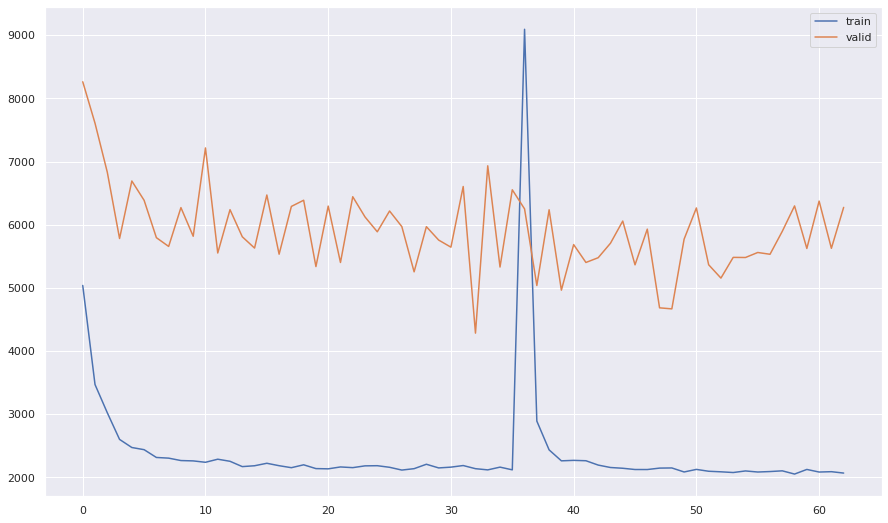

In [98]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.legend()
plt.show()

## Inference

In [99]:
from tensorflow.keras.models import load_model

In [100]:
model = load_model('M5_LSTM_CA_TX_WI_28_days.h5')

In [101]:
pred_y = model.predict(test_X)
pred_y

array([[[ 8222.456 ,  5463.6187,  5150.7705]],

       [[ 9115.472 ,  6056.897 ,  5710.107 ]],

       [[10096.009 ,  6708.3213,  6324.263 ]],

       [[11412.516 ,  7582.9478,  7148.851 ]],

       [[12835.234 ,  8528.137 ,  8039.9653]],

       [[13111.583 ,  8711.73  ,  8213.056 ]],

       [[12907.028 ,  8575.833 ,  8084.933 ]],

       [[12284.312 ,  8162.13  ,  7694.8975]],

       [[12149.676 ,  8072.682 ,  7610.568 ]],

       [[10770.176 ,  7156.2065,  6746.524 ]],

       [[ 8913.612 ,  5922.7905,  5583.673 ]],

       [[ 8940.156 ,  5940.4253,  5600.2993]],

       [[ 8944.365 ,  5943.222 ,  5602.936 ]],

       [[ 8998.888 ,  5979.444 ,  5637.085 ]],

       [[ 9649.159 ,  6411.4546,  6044.3804]],

       [[ 9532.415 ,  6333.895 ,  5971.2583]],

       [[ 9384.493 ,  6235.6235,  5878.608 ]],

       [[ 9325.972 ,  6196.7437,  5841.9526]],

       [[ 9722.095 ,  6459.91  ,  6090.0635]],

       [[ 9631.81  ,  6399.9287,  6033.5137]],

       [[10014.644 ,  6654.266 ,  6273.3

In [102]:
pred_y.shape

(262, 1, 3)

In [103]:
pred_y = pred_y.reshape(test_Y.shape)

In [104]:
pred_y.shape

(262, 1, 3)

In [105]:
from sklearn.metrics import mean_absolute_error

In [106]:
mean_absolute_error(test_Y[:, 0], pred_y[:, 0])

4284.0903

In [107]:
test_Y[:, :, 0][:, 0]

array([13800., 15904., 15904., 15904., 21392., 21392., 21392., 23504.,
       23504., 23504., 16624., 16624., 16624., 15144., 15144., 15144.,
       15376., 15376., 15376., 15456., 15456., 15456., 16912., 16912.,
       16912., 23216., 23216., 23216., 18656., 18656., 18656., 15568.,
       15568., 15568., 15576., 15576., 15576., 16328., 16328., 16328.,
       16960., 16960., 16960., 16864., 16864., 16864., 21856., 21856.,
       21856., 19232., 19232., 19232., 19232., 19232., 19232., 15248.,
       15248., 15248., 14552., 14552., 14552., 15304., 15304., 15304.,
       17120., 17120., 17120., 21344., 21344., 21344., 22544., 22544.,
       22544., 16272., 16272., 16272., 14616., 14616., 14616., 13944.,
       13944., 13944., 14520., 14520., 14520., 16344., 16344., 16344.,
       21552., 21552., 21552., 23152., 23152., 23152., 16232., 16232.,
       16232., 16296., 16296., 16296., 15416., 15416., 15416., 15624.,
       15624., 15624., 16096., 16096., 16096., 22016., 22016., 22016.,
      

In [108]:
df_sales_predicted = pd.DataFrame(list(zip(
                                            list(test_Y[:, :, 0][:, 0]),
                                            list(test_Y[:, :, 1][:, 0]),
                                            list(test_Y[:, :, 2][:, 0]),
                                            list(pred_y[:, :, 0][:, 0]),
                                            list(pred_y[:, :, 1][:, 0]),
                                            list(pred_y[:, :, 2][:, 0]))), 
                                  columns = ['true_sales_CA', 'true_sales_TX', 'true_sales_WI', 'predicted_sales_CA', 'predicted_sales_TX', 'predicted_sales_WI'])
df_sales_predicted.head()

,true_sales_CA,true_sales_TX,true_sales_WI,predicted_sales_CA,predicted_sales_TX,predicted_sales_WI
0,13800.0,8896.0,9776.0,8222.456055,5463.618652,5150.770508
1,15904.0,9744.0,11992.0,9115.471680,6056.896973,5710.106934
2,15904.0,9744.0,11992.0,10096.008789,6708.321289,6324.263184
3,15904.0,9744.0,11992.0,11412.515625,7582.947754,7148.851074
4,21392.0,11936.0,15776.0,12835.234375,8528.136719,8039.965332


In [109]:
df_sales_predicted.shape

(262, 6)

In [110]:
df_sales_predicted['date'] = sales_df_test_dates[55:]

In [111]:
df_sales_predicted.set_index('date', inplace = True, drop = True)
df_sales_predicted.head()

,true_sales_CA,true_sales_TX,true_sales_WI,predicted_sales_CA,predicted_sales_TX,predicted_sales_WI
date,,,,,,
2016-01-19,13800.0,8896.0,9776.0,8222.456055,5463.618652,5150.770508
2016-01-19,15904.0,9744.0,11992.0,9115.471680,6056.896973,5710.106934
2016-01-20,15904.0,9744.0,11992.0,10096.008789,6708.321289,6324.263184
2016-01-20,15904.0,9744.0,11992.0,11412.515625,7582.947754,7148.851074
2016-01-20,21392.0,11936.0,15776.0,12835.234375,8528.136719,8039.965332


Text(0.5, 1.0, 'California True vs Predicted Sales')

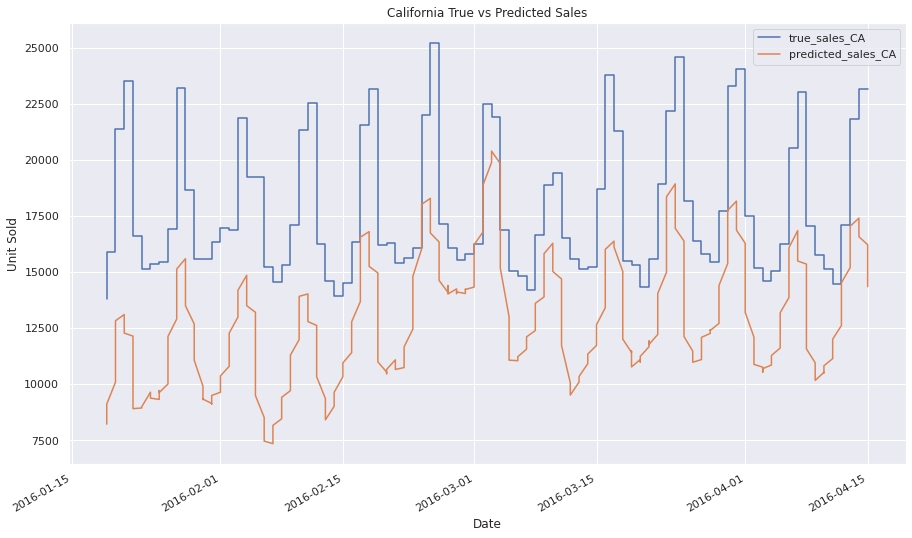

In [112]:
df_sales_predicted[['true_sales_CA', 'predicted_sales_CA']].plot()
plt.xlabel('Date')
plt.ylabel('Unit Sold')
plt.title('California True vs Predicted Sales')

Text(0.5, 1.0, 'Texas True vs Predicted Sales')

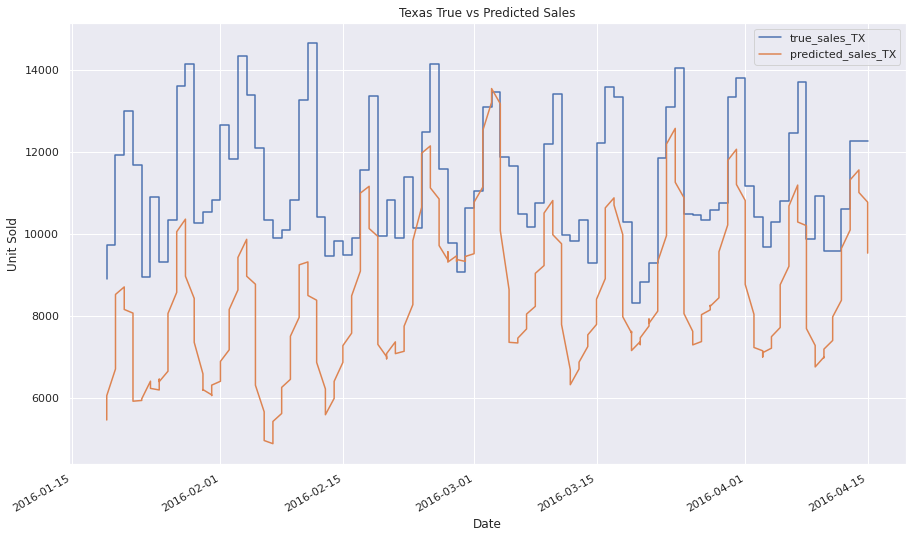

In [113]:
df_sales_predicted[['true_sales_TX', 'predicted_sales_TX']].plot()
plt.xlabel('Date')
plt.ylabel('Unit Sold')
plt.title('Texas True vs Predicted Sales')

Text(0.5, 1.0, 'Wisconsin True vs Predicted Sales')

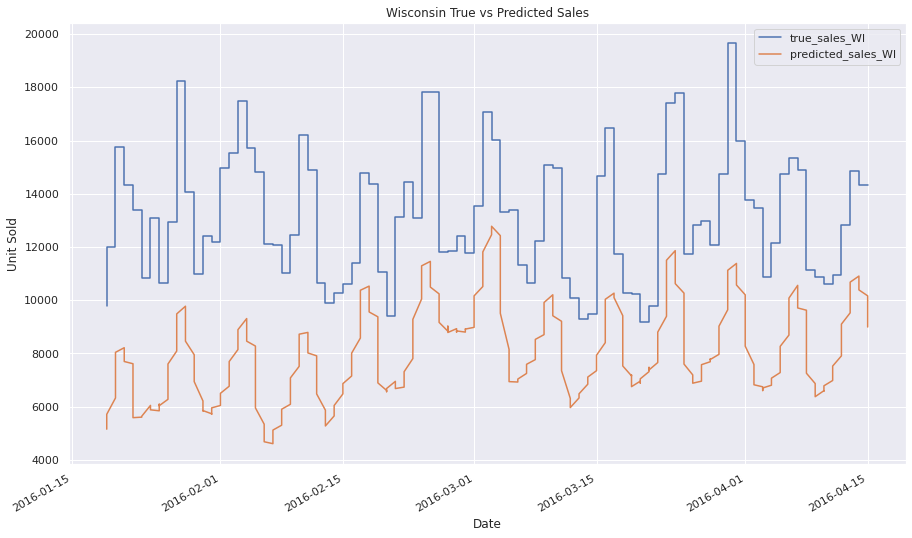

In [114]:
df_sales_predicted[['true_sales_WI', 'predicted_sales_WI']].plot()
plt.xlabel('Date')
plt.ylabel('Unit Sold')
plt.title('Wisconsin True vs Predicted Sales')

## Saving Test Data Points, Scaler Instance for WIT analysis

In [115]:
import joblib

In [116]:
# Dump scaler instance 
joblib.dump(scaler_instance, 'scaler_instance_mn_mx_28_days.bz')

['scaler_instance_mn_mx_28_days.bz']

In [117]:
test_x.to_csv('combined_test_data_points_28_days.csv', index = False)